<a href="https://colab.research.google.com/github/Mcclearyjeremy94/Project-1/blob/main/Project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = '/content/drive/MyDrive/healthcare-dataset-stroke-data.csv'
df= pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#make a copy of the original data to not ruin any of the original data
ml_df= df.copy()

In [5]:
ml_df.info()
#from this list I think I can take out the columns: 'id', 'gender', 'ever_married', 'work_type', and also the 'Residence_type'.
#they do not contain any substantial data I feel that will affect determining if the patient will have a stroke or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
ml_df.drop(columns= ['id','gender','ever_married','work_type','Residence_type'], inplace=True)
ml_df.info()
#these 6 columns seem to be the only columns that actually have any information that would pertain to the actual target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                4909 non-null   float64
 5   smoking_status     5110 non-null   object 
 6   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 279.6+ KB


In [7]:
#lets now check for duplicates
ml_df.duplicated().sum()
#there are no duplicates in the data which is good

0

In [8]:
#lets check for missing values
ml_df.isna().sum()
#we will be able to fix that later with using a mean imputer

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#checking for any inconsitencies indata
ml_df['age'].dtype
#lets change these all of these to intergers and not floats
ml_df['age']= ml_df['age'].astype(int)
#lets now check if that is correct
ml_df['age'].dtype
#that looks better now

dtype('int64')

In [10]:
#lets check for outliers in the rest of the data
#after doing multiple checks it seems that there are no outliers in the data as well

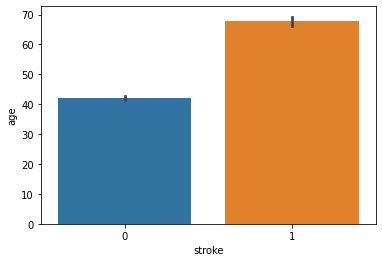

In [17]:
ax_age = sns.barplot(data = ml_df, x = 'stroke', y = 'age')
ax_age

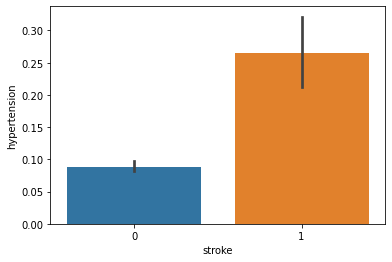

In [18]:
ax_hypertension= sns.barplot(data= ml_df, x='stroke', y='hypertension')
ax_hypertension

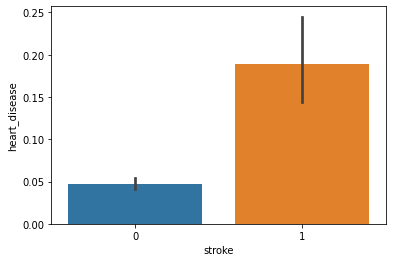

In [21]:
ax_heart_disease= sns.barplot(data= ml_df, x='stroke', y='heart_disease')
ax_heart_disease;

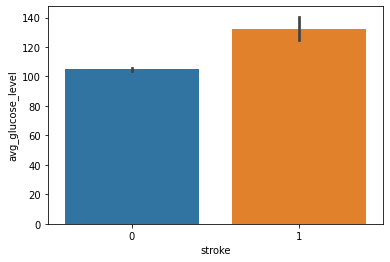

In [20]:
ax_glucose_level= sns.barplot(data= ml_df, x='stroke', y='avg_glucose_level')
ax_glucose_level;

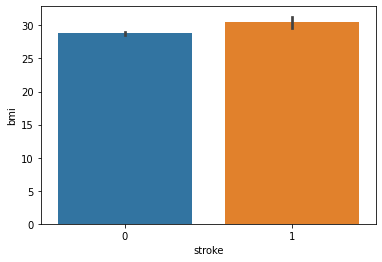

In [22]:
ax_bmi= sns.barplot(data= ml_df, x='stroke', y='bmi')
ax_bmi;

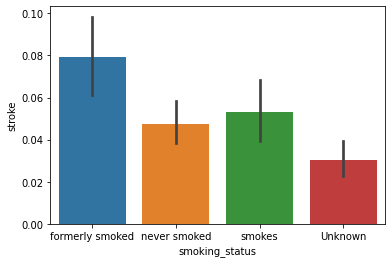

In [24]:
ax_smoking_status= sns.barplot(data= ml_df, x='smoking_status', y='stroke')
ax_smoking_status;

#I decided when cleaning the data to remove the,'id','gender','ever_married','work_type','Residence_type', columns from the data seeing as they didnt specifically pertain to the actual target itself(stroke or not having a stroke).